In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Students Social Media Addiction.csv")
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [7]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.shape

(705, 13)

In [157]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


# Gender Distribution 

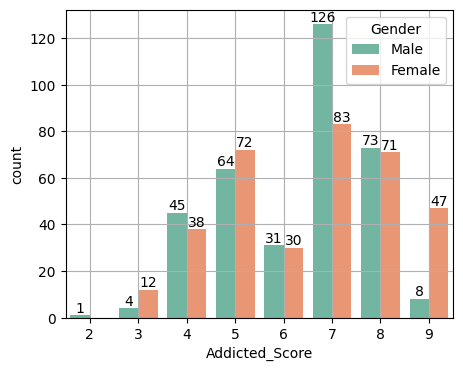

In [38]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x = "Addicted_Score",data = df,hue = "Gender" ,palette = "Set2")
for x in ax.containers:
    ax.bar_label(x)
plt.grid()
plt.show()

In [18]:
# here we concluded that Social media addiction is prevalent in both genders,
# with males showing a stronger addiction at moderate-high levels(5-7score)
# while females show relatively higher representation at the extreme high addiction level(9 score)

# Addiction score in Top 10 Country

In [31]:
top_countries = df['Country'].value_counts().head(10).index
df_top = df[df['Country'].isin(top_countries)]

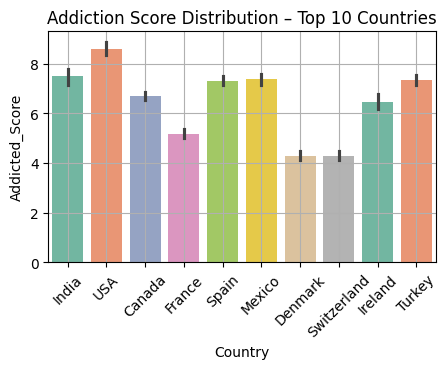

In [35]:
plt.figure(figsize=(5,3))
ax = sns.barplot(x ='Country', y ='Addicted_Score', data=df_top,hue ="Country",palette = "Set2")# marker = 'o',linewidth = 0.5, linestyle = '--')
plt.title('Addiction Score Distribution – Top 10 Countries')
plt.grid(True)
plt.xticks(rotation = 45)
plt.show()

In [54]:
# here we concluded that the high addiction is occured in  Usa top 10 countries and then in india

# Percentage of affects on acedemic performance

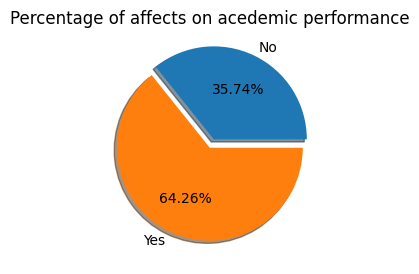

,Affects_Academic_Performance
Affects_Academic_Performance,
No,252
Yes,453


In [12]:
plt.figure(figsize=(3,5))
gb = df.groupby('Affects_Academic_Performance').agg({'Affects_Academic_Performance':'count'})
plt.pie(gb['Affects_Academic_Performance'],labels = gb.index,autopct = "%1.2f%%",shadow = True, explode =[0.1,0])
plt.title("Percentage of affects on acedemic performance")

plt.show()
gb

In [66]:
# here we concluded that the social media is highily impact on acdemic performance

# Relationship between avg_daily_hours and acedemic level

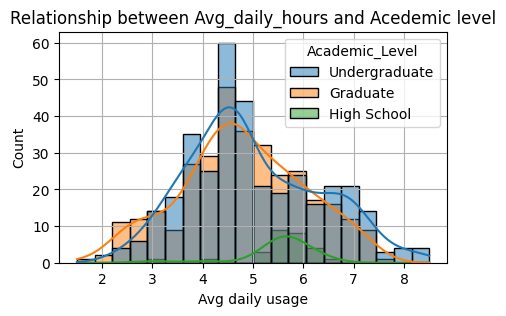

In [15]:
plt.figure(figsize=(5,3))
sns.histplot(x = "Avg_Daily_Usage_Hours",bins = 20 ,data =df, hue = "Academic_Level", kde = True)
plt.grid()
plt.xlabel("Avg daily usage")
plt.title("Relationship between Avg_daily_hours and Acedemic level")
plt.show()

In [76]:
# here we concluded that the undergraduate student show hight usage ofsocial media,
# graduate student show moderate usage

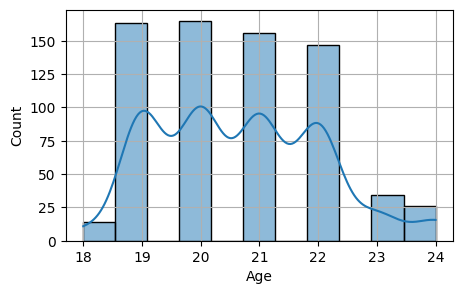

In [16]:
plt.figure(figsize=(5,3))
sns.histplot(x ="Age", data = df ,kde = True)
plt.grid(True)
plt.show()


In [101]:
# from above chart Here we concluded that the Age group (19 -22) are making high usage of social media

# Most Used Social Media Platform

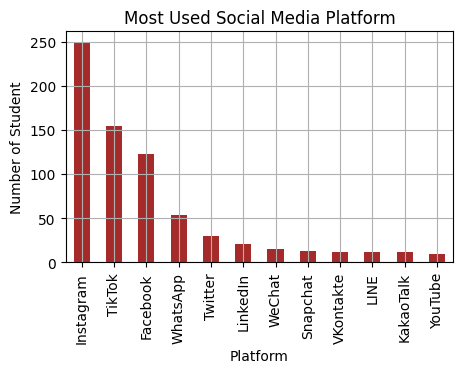

In [17]:
plt.figure(figsize=(5,3))
df["Most_Used_Platform"].value_counts().plot(kind = "bar", color = "brown")
plt.grid(True)
plt.title("Most Used Social Media Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Student")
plt.show()

# Relationship between Avg_daily usage and Sleep hour

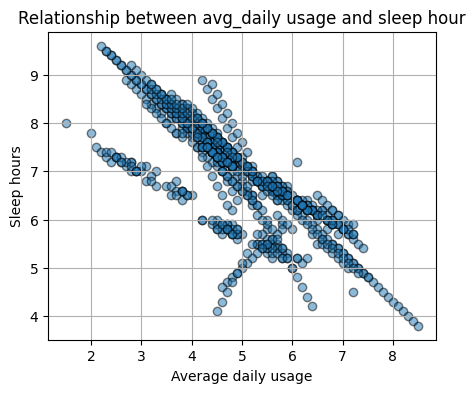

In [21]:
plt.figure(figsize = [5,4])
plt.scatter(y = "Sleep_Hours_Per_Night", x = "Avg_Daily_Usage_Hours",data = df, alpha = 0.5,edgecolor = "black")
plt.grid(True)
plt.xlabel("Average daily usage")
plt.ylabel("Sleep hours")
plt.title("Relationship between avg_daily usage and sleep hour")
plt.show()

In [140]:
# from the above chart we concluded that higher social media usage consistently decreases the sleep hours
# It also make impact on academatic peformance and higher addiction risk

# Correlation Heatmap

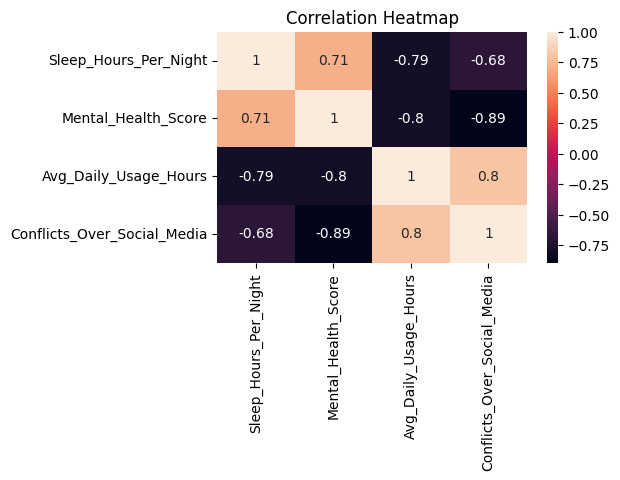

In [22]:
plt.figure(figsize = [5,3])
sns.heatmap(df[["Sleep_Hours_Per_Night","Mental_Health_Score","Avg_Daily_Usage_Hours","Conflicts_Over_Social_Media"]].corr(),
            annot = True)
plt.title("Correlation Heatmap")
plt.show()

In [183]:
# from above chart we concluded that high social media usage negatively impact on sleep and mental health and increase social conflicts 
# While better sleep support good mental health

In [24]:
country_usage = df.groupby("Country").agg({"Avg_Daily_Usage_Hours":"mean"}).sort_values(by= "Avg_Daily_Usage_Hours",ascending = False)
country_usage.head(10)

,Avg_Daily_Usage_Hours
Country,
USA,6.890000
UAE,6.725000
Mexico,6.422222
Ecuador,6.300000
India,6.116981
Czech Republic,6.100000
Thailand,5.900000
Armenia,5.900000
Brazil,5.887500


# Country With Highest Avg_daily_usage

<Figure size 500x400 with 0 Axes>

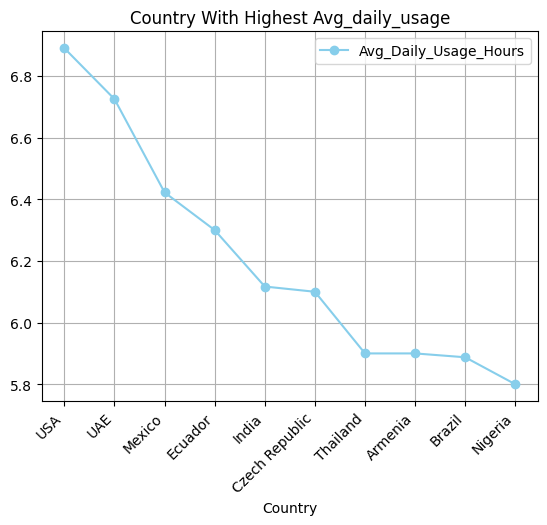

In [29]:
plt.figure(figsize=[5,4])
ax = country_usage.head(10).plot(kind = "line" ,color = 'skyblue',marker= "o")
plt.grid(True)
ax.set_xticks(range(len(country_usage.head(10))))
ax.set_xticklabels(country_usage.head(10).index, rotation=45, ha='right')
plt.title("Country With Highest Avg_daily_usage")
plt.show()

In [176]:
# From above chart we concluded that Country with highest avg_daily_usage is USA 
# As we see before the addiction Score is highest for Country USA

# Conclusion